# 1. Keras tutorial

- 1.1 Keras Basic(y=3x Regression) - ANN(단층 레이어)
- 1.2 Keras MNIST - ANN(단층 레이어)
- 1.3 Keras MNIST - DNN(다층 레이어)
- 1.4 Keras MNIST - 나만의 모델 만들기

In [1]:
# Import Libraries
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1.1 Keras Basic Y = 3X ANN Regression
- 이번 실습에서는 Keras를 이용하여 1차함수를 예측하는 학습 모델을 만들고, 성능을 평가한다.

### (1) 데이터셋 준비

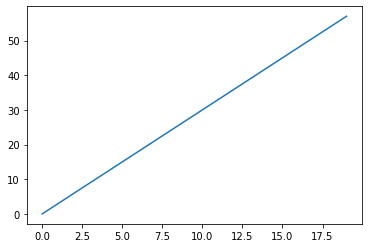

In [2]:
# Training Data
x = np.arange(20) # 0, 1, 2, 3, ...., 19
y = x * 3 # 0, 3, 6, 9, ..., 57
plt.plot(x,y)

# Testing Data 
x_test = np.arange(50,70) # 50, 51, 52, ..., 69
y_test = x_test*3 # 150, 153, 156, ..., 207

# Dimension of input and output
n_in = 1
n_out = 1

### (2) Keras 모델링

- keras.layers : 모델을 구성하기 위한 layer들이 구현되어 있는 모듈

- keras.models : layer들을 묶어 모델을 정의하고 학습, 평가, 예측 등의 기능을 구현한 모듈

In [3]:
from tensorflow.keras import layers, models

Keras에서는 크게 Functional, Sequential 방식으로 모델을 구현

- Sequential : 모델에 필요한 layer들을 순차적으로 더해가는 방식으로 구현
- Function : 모델을 수식처럼 구현 

<Sequential에 사용되는 Layer>

- Dense : Fully Connected Layer (https://keras.io/layers/core/#dense)

### Sequential Modeling

In [8]:
def modeling_sequential(n_in, n_out):
    # Coding Time
    model = models.Sequential()
    model.add(layers.Dense(units = n_out, input_shape = (n_in,)))

    return model

In [11]:
class modeling_sequential_class(models.Sequential):
    def __init__(self, n_in, n_out):
        
        #멤버 변수로 모델에 사용할 변수 선언
        self.n_in = n_in
        self.n_out = n_out
        
        #상속받은 Sequential 클래스 초기화 후 레이어 추가
        super().__init__()
        self.add(layers.Dense(units =n_out, input_shape=(n_in,)))

<Functional에 사용되는 Layer>

- Input : 모델에 입력되는 데이터의 batch size를 제외한 shape을 결정

- Dense : Fully Connected Layer (https://keras.io/layers/core/#dense)

### Functional Modeling

In [6]:
def modeling_functional(n_in, n_out):
    # Coding Time
    x = layers.Input(shape = (n_in,))
    y = layers.Dense(n_out)(x)
    model = models.Model(inputs = x, outputs = y)
    
    return model

In [12]:
class modeling_functional_class(models.Model):
    def __init__(self, n_in, n_out):
        
        #멤버 변수로 모델에 사용할 변수 및 레이어 선언
        self.n_in = n_in
        self.n_out = n_out
        input = layers.Input(shape=(n_in,))
        output = layers.Dense(n_out)
        
        # layer 연결
        x = input
        y = output(x)

        #상속받은 Model 클래스 초기화
        super().__init__(x, y)

### (2)-2 모델 시각화

model.summary()나 plot_model(model) 활용

In [9]:
model =  modeling_sequential(n_in, n_out)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


2022-09-02 15:05:46.306293: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-02 15:05:46.765355: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21963 MB memory:  -> device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:b3:00.0, compute capability: 8.6


In [13]:
model =  modeling_sequential_class(n_in, n_out)
model.summary()

Model: "modeling_sequential_class"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [14]:
model =  modeling_functional(n_in, n_out)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [15]:
model = modeling_functional_class(n_in, n_out)
model.summary()

Model: "modeling_functional_class"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


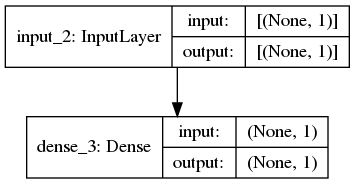

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

### (3) 모델의 학습과정 설정(model.compile)
- model.compile(loss, optimizer, metrics)
- optimizer(str) : optimizer instance
- loss(str) : loss function
- metrics(str) : list of metrics to be evaluated by the model during training and testing
(https://www.tensorflow.org/api_docs/python/tf/keras/Model)

In [17]:
# Coding Time
model.compile(loss = 'mse', optimizer = 'sgd')

### (4) 모델 학습시키기(model.fit)

 - x : Input data
 - y : Label of training input data
 - batch_szie(int) : Number of samples per gradient update
 - steps_per_epoch(int) : Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch
 - epochs(int) : Number of epochs to train the model
 - verbose : 0 = silent, 1 = progress bar, 2 = one line per epoch
 - callbacks : List of callback instances
 - validation_split(float) : Fraction of the training data to be used as validation data
 - validation_data : (x_val, y_val)
 - shuffle(bool) : Whether to shuffle the training data before each epoch
 - history : 학습과정이 담겨있는 데이터 송출
 (https://www.tensorflow.org/api_docs/python/tf/keras/Model)

In [18]:
# Coding Time
history = model.fit(x, y, batch_size = 5, epochs = 100, validation_split = 0.2)

2022-09-02 15:08:09.430983: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
4/4 [==============================] - 1s 40ms/step - loss: 244.0174 - val_loss: 7.7903
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 0.9645 - val_loss: 0.2291
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 0.1249 - val_loss: 0.3833
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1383 - val_loss: 0.8360
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2535 - val_loss: 0.5586
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0544 - val_loss: 0.1558
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0442 - val_loss: 1.0224
Epoch 8/100
4/4 [==============================] - 0s 11ms/step - loss: 0.1714 - val_loss: 0.1420
Epoch 9/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0369 - val_loss: 0.0078
Epoch 10/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0371 - val_loss: 0.6480
Epoch 11/100
4/4 [==

Epoch 84/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0019 - val_loss: 0.0106
Epoch 85/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0015 - val_loss: 0.0060
Epoch 86/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0015 - val_loss: 0.0577
Epoch 87/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0097 - val_loss: 0.0281
Epoch 88/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0075 - val_loss: 0.0034
Epoch 89/100
4/4 [==============================] - 0s 9ms/step - loss: 9.5222e-04 - val_loss: 6.7068e-04
Epoch 90/100
4/4 [==============================] - 0s 12ms/step - loss: 8.9810e-04 - val_loss: 0.0085
Epoch 91/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0022 - val_loss: 0.0145
Epoch 92/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0043 - val_loss: 0.0066
Epoch 93/100
4/4 [==============================] - 0s 11ms/step - loss: 8.5874e-04 - val_loss: 0.006

### (5) 모델 평가하기
모델 객체의 evaluate 함수로 test 데이터에 대한 모델의 성능을 평가
 - x : Input data
 - y : Label of testing input data
 - batch_size(int) : Number of samples per batch of computation
 - steps(int) : Total number of steps (batches of samples) before declaring the evaluation round finished
 - verbose : 0 = silent, 1 = progress bar, 2 = one line per epoch

In [19]:
# Coding Time
loss = model.evaluate(x_test, y_test, batch_size = 20)
print('loss : %.4f' % (loss))

1/1 [==============================] - 0s 54ms/step - loss: 0.1031
loss : 0.1031


## (6) 모델 사용하기
모델 객체의 predict 함수로 input 데이터에 대한 모델의 예측결과를 반환
 - x : Input data
 - batch_size(int) : Number of samples per batch
 - steps(int) : Total number of steps (batches of samples) before declaring the prediction round finished
 - verbose : 0 = silent(recommend), 1 = progress bar, 2 = one line per epoch

In [20]:
new_x = np.arange(100,120)
true_y = new_x*3

pred_y = model.predict(new_x, batch_size=20, verbose = 0)
pred_y = np.reshape(pred_y,(-1,))
for y in zip(new_x, true_y, pred_y):
    print("x: %.2f,  y : %.2f,  y_predict : %.2f"%(y[0], y[1], y[2]))

x: 100.00,  y : 300.00,  y_predict : 299.43
x: 101.00,  y : 303.00,  y_predict : 302.43
x: 102.00,  y : 306.00,  y_predict : 305.42
x: 103.00,  y : 309.00,  y_predict : 308.41
x: 104.00,  y : 312.00,  y_predict : 311.41
x: 105.00,  y : 315.00,  y_predict : 314.40
x: 106.00,  y : 318.00,  y_predict : 317.40
x: 107.00,  y : 321.00,  y_predict : 320.39
x: 108.00,  y : 324.00,  y_predict : 323.38
x: 109.00,  y : 327.00,  y_predict : 326.38
x: 110.00,  y : 330.00,  y_predict : 329.37
x: 111.00,  y : 333.00,  y_predict : 332.37
x: 112.00,  y : 336.00,  y_predict : 335.36
x: 113.00,  y : 339.00,  y_predict : 338.35
x: 114.00,  y : 342.00,  y_predict : 341.35
x: 115.00,  y : 345.00,  y_predict : 344.34
x: 116.00,  y : 348.00,  y_predict : 347.33
x: 117.00,  y : 351.00,  y_predict : 350.33
x: 118.00,  y : 354.00,  y_predict : 353.32
x: 119.00,  y : 357.00,  y_predict : 356.32


## 1.2 MNIST Classification with Linear Classifier
이번 실습에서는 keras로 linear 모델을 생성하고, MNIST dataset을 학습하여 성능을 평가한다.

In [21]:
import tensorflow.keras.utils as utils
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation

import numpy as np
import matplotlib.pyplot as plt

### (1) 데이터셋 다운로드
### Download the MNIST dataset
MNIST dataset은 28x28 사이즈의 이미지들로 0~9까지의 숫자 10개의 손글씨 이미지로 이루어져있다.

60,000장이 training에 사용되고 10,000장이 test에 사용된다.

In [22]:
# Coding Time
(X_train, Y_train), (X_test, Y_test) = datasets.mnist.load_data()
print(X_train.shape, Y_train.shape)

11501568/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)


label :  5


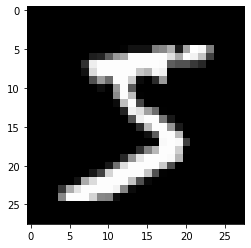

In [24]:
# 첫번째 레이블과 train 불러오기

print('label : ',Y_train[0])
plt.imshow(X_train[0], cmap='gray')

In [25]:
# Coding Time
# Flatten and Normalization
X_train_flat = X_train.reshape(60000, 28 * 28).astype('float32') / 255.0
X_test_flat = X_test.reshape(10000, 28 * 28).astype('float32') / 255.0

# One-hot Encoding
Y_train_onehot = utils.to_categorical(Y_train)
Y_test_onehot = utils.to_categorical(Y_test)


print(Y_train_onehot)
print(X_train_flat.shape, Y_train_onehot.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(60000, 784) (60000, 10)


### (2) Keras 모델링

<사용되는 Layer>

- Input : 모델에 입력되는 데이터의 batch size를 제외한 shape을 결정(https://keras.io/layers/core/#input)

- Dense : Fully Connected Layer(https://keras.io/layers/core/#dense)

- Activation : Activation Function을 정의, 문자열로 입력(https://keras.io/layers/core/#activation)

In [26]:
n_in = 28*28   #784
n_out = np.shape(Y_test_onehot)[1] # 10

In [27]:
print(n_in)
print(n_out)

784
10


### Sequential Modeling

In [28]:
def linear_model_seq(n_in, n_out):
    # Coding Time
    model = Sequential()
    model.add(Dense(units = n_out, input_shape = (n_in,), activation = 'softmax'))

    return model

### Functional Modeling

In [34]:
def linear_model_func(n_in, n_out):
    # Coding Time
    x = Input(shape = (n_in,))
    h = Dense(n_out)(x)
    y = Activation('softmax')(h)
    model = Model(inputs = x, outputs = y)

    return model

In [35]:
model = linear_model_func(n_in, n_out)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


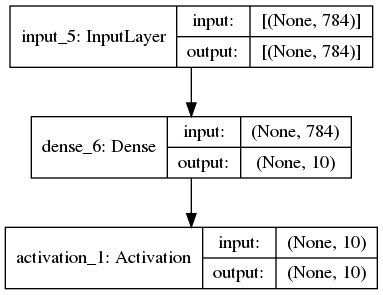

In [36]:
plot_model(model, show_shapes=True)

## (3) 모델의 학습과정 설정
accuracy를 측정할 수 있는 문제라면 metric에 accuracy를 설정 (https://keras.io/models/model/)

In [37]:
# Coding Time (loss : categorical / optimizer : sgd / metrics : accuracy)
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'sgd',
             metrics = ['accuracy'])

## (4) 모델 학습시키기

In [39]:
# Coding Time (batch : 128 / epoch : 20 / validation_split : 0.2)
history = model.fit(X_train_flat, 
                    Y_train_onehot,
                   batch_size = 128,
                   epochs = 20,
                   validation_split = 0.2)

Epoch 1/20
 74/375 [====>.........................] - ETA: 0s - loss: 2.0797 - accuracy: 0.3285

2022-09-02 15:22:08.598910: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


375/375 [==============================] - 1s 3ms/step - loss: 1.4036 - accuracy: 0.6667 - val_loss: 0.9039 - val_accuracy: 0.8267
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.7946 - accuracy: 0.8297 - val_loss: 0.6601 - val_accuracy: 0.8575
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.6428 - accuracy: 0.8513 - val_loss: 0.5635 - val_accuracy: 0.8693
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.5699 - accuracy: 0.8615 - val_loss: 0.5102 - val_accuracy: 0.8765
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.5258 - accuracy: 0.8690 - val_loss: 0.4754 - val_accuracy: 0.8838
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.4955 - accuracy: 0.8742 - val_loss: 0.4512 - val_accuracy: 0.8873
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.4731 - accuracy: 0.8786 - val_loss: 0.4330 - val_accuracy: 0.8900
Epoch 8/20
375/37

## (5) 모델 평가하기

In [40]:
# Coding Time (batch size : 128)
loss_and_accuracy = model.evaluate(X_test_flat,
                                  Y_test_onehot,
                                  batch_size = 128)

print('loss : %.4f, accuracy : %.4f' % (loss_and_accuracy[0], loss_and_accuracy[1]))

79/79 [==============================] - 0s 2ms/step - loss: 0.3484 - accuracy: 0.9068
loss : 0.3484, accuracy : 0.9068


## (6) 모델 사용하기

real_label : 6, predict_label : 6


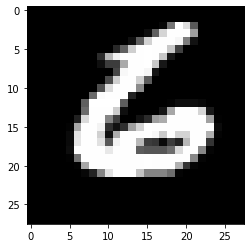

In [41]:
# Coding Time
test_data = X_test[-1].reshape(1, 28 * 28)
pred_y = model.predict(test_data)
pred_y = pred_y.argmax()

print('real_label : {}, predict_label : {}'.format(Y_test[-1], pred_y))
plt.imshow(X_test[-1], cmap='gray')

# 1.3 MNIST Classification with DNN (To Do)

모델의 설명을 보고 DNN 코드를 만들어보자

## (2) Keras 모델링

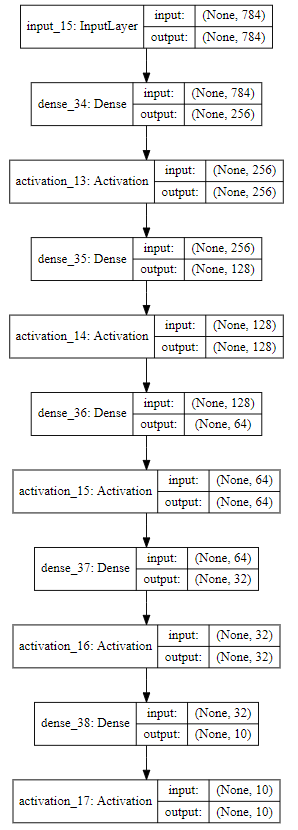

<맨 마지막 activation은 softmax로 하고 이외의 activation은 relu를 사용>

In [51]:
def DNN_seq(n_in, n_out):
    model = models.Sequential()
    model.add(layers.Dense(units = 256, input_shape = (n_in,), activation = 'relu'))
    model.add(layers.Dense(units = 128, input_shape = (256,), activation = 'relu'))
    model.add(layers.Dense(units = 64, input_shape = (128,), activation = 'relu'))
    model.add(layers.Dense(units = 32, input_shape = (64,), activation = 'relu'))
    model.add(layers.Dense(units = n_out, input_shape = (32,), activation = 'softmax'))
    return model




def DNN_func(n_in, n_out):
    x = Input(shape=(n_in,))
    x = Dense(256)(x)
    x = Activation('relu')(x)
    x = Dense(128)(x)
    x = Activation('relu')(x)
    x = Dense(64)(x)
    x = Activation('relu')(x)
    x = Dense(32)(x)
    x = Activation('relu')(x)
    x = Dense(n_out)(x)
    y = Activation('softmax')(x)
    model = Model(inputs = x, outputs = y)
    return model



model = DNN_seq(n_in, n_out)
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_51 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_52 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_53 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_54 (Dense)             (None, 10)                330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________


In [52]:
model = DNN_func(n_in, n_out)
model.summary()

Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: dense_59/BiasAdd:0


ValueError: Graph disconnected: cannot obtain value for tensor KerasTensor(type_spec=TensorSpec(shape=(None, 784), dtype=tf.float32, name='input_11'), name='input_11', description="created by layer 'input_11'") at layer "dense_55". The following previous layers were accessed without issue: []

## (3) 모델의 학습과정 설정
<optimizer를 adam으로 설정>

In [53]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
             metrics = ['accuracy'])

## (4) 모델 학습시키기
<batch size를 256, epoch을 30, train 데이터 중 30%를 validation 데이터로 사용, verbose 모드는 2>

In [54]:
history = model.fit(X_train_flat,
                   Y_train_onehot,
                   batch_size = 256,
                   epochs = 30,
                   validation_split = 0.3,
                   verbose = 2)

Epoch 1/30
165/165 - 1s - loss: 0.4565 - accuracy: 0.8680 - val_loss: 0.2014 - val_accuracy: 0.9399
Epoch 2/30
165/165 - 1s - loss: 0.1540 - accuracy: 0.9542 - val_loss: 0.1451 - val_accuracy: 0.9571
Epoch 3/30
165/165 - 1s - loss: 0.1029 - accuracy: 0.9688 - val_loss: 0.1278 - val_accuracy: 0.9621
Epoch 4/30
165/165 - 1s - loss: 0.0791 - accuracy: 0.9758 - val_loss: 0.1083 - val_accuracy: 0.9679
Epoch 5/30
165/165 - 1s - loss: 0.0531 - accuracy: 0.9841 - val_loss: 0.1138 - val_accuracy: 0.9656
Epoch 6/30
165/165 - 1s - loss: 0.0416 - accuracy: 0.9874 - val_loss: 0.0997 - val_accuracy: 0.9716
Epoch 7/30
165/165 - 1s - loss: 0.0309 - accuracy: 0.9910 - val_loss: 0.1010 - val_accuracy: 0.9715
Epoch 8/30
165/165 - 1s - loss: 0.0264 - accuracy: 0.9916 - val_loss: 0.1071 - val_accuracy: 0.9713
Epoch 9/30
165/165 - 1s - loss: 0.0200 - accuracy: 0.9935 - val_loss: 0.1112 - val_accuracy: 0.9706
Epoch 10/30
165/165 - 1s - loss: 0.0165 - accuracy: 0.9952 - val_loss: 0.1146 - val_accuracy: 0.9721

## (5) 모델 평가하기

## (6) 모델 사용하기 (5개의 샘플 확인하기)

## (7) 모델 저장하고 불러오기

저장하기 : model 객체의 내부 함수인 save() .h5 형식으로 저장할 수 있음 [1.모델의 구조, 2.학습된 파라미터, 3.complie() 설정]

In [ ]:
# Coding Time


불러오기 : load_model 함수로 .h5 파일에서 모델을 불러올 수 있음

In [ ]:
# Coding Time


# ======================================================

# 1.4 Keras MNIST - 모델의 성능을 직접 높혀보자
 - DNN의 구조를 바꾸어 나만의 모델을 만들어보자
 - 목표 정확도: 평가 셋에 대해 98.5% 만들기
 - 바꿀 수 있는 하이퍼 파라미터: Learning Rate, Batch size, Epochs, Optimizer, Activation Function, 모델 레이어 구조 등

## (2) Keras 모델링

## (3) 모델의 학습과정 설정

## (4) 모델 학습시키기

## (5) 모델 평가하기